# Estimating distributions (part 2)
The goal of this notebook is to explore a first approach to approximate $p(y|x)$ and $p(x|y)$ on a tabular dataset where $x$ is real-valued, $x\in\mathbb{R}^k$, and the target $y$ is discrete and finite, $y\in\{0,\ldots,d\}⊆\mathbb{N}, d\geq 1$.

## Imports

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data set

In [2]:
iris = datasets.load_iris()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X = iris.data
y = iris.target

In [6]:
sepal_length = X[:, 0]
sepal_length

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

## Approximate $p(y|x)$
Take $x$ to be sepal length and estimate the conditional probability of the target variable $y$ given $x$. Then, sample 10 values of $y$ given a $x=4.75$.

Realizamos un histograma de sepal length, diferenciando por clase. 

In [7]:
setosa_sepal_length = sepal_length[y == 0]
versicolor_sepal_length = sepal_length[y == 1]
virginica_sepal_length = sepal_length[y == 2]

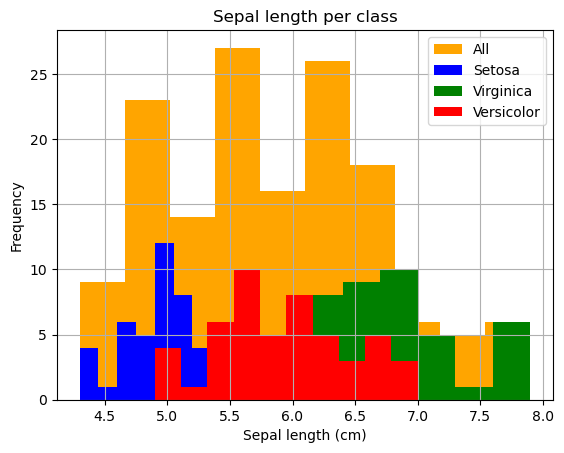

In [8]:
plt.hist(sepal_length, bins=10, color="orange", label="All")
plt.hist(setosa_sepal_length, bins=10, color="blue", label="Setosa")
plt.hist(virginica_sepal_length, bins=10, color="green", label="Virginica")
plt.hist(versicolor_sepal_length, bins=10, color="red", label="Versicolor")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Frequency")
plt.title("Sepal length per class")
plt.legend()
plt.grid(True)
plt.show()

Definimos los bins y discretizamos sepal length:

[ 3  2  2  1  2  3  1  2  1  2  3  2  2  1  4  4  3  3  4  3  3  3  1  3
  2  2  2  3  3  2  2  3  3  4  2  2  4  2  1  3  2  1  1  2  3  2  3  1
  3  2  7  6  7  4  6  4  5  2  6  3  2  5  5  5  4  7  4  4  5  4  5  5
  5  5  6  6  7  7  5  4  4  4  4  5  3  5  7  5  4  4  4  5  4  2  4  4
  4  5  3  4  5  4  7  5  6  9  2  8  7  8  6  6  7  4  4  6  6  9  9  5
  7  4  9  5  7  8  5  5  6  8  8 10  6  5  5  9  5  6  5  7  7  7  4  7
  7  7  5  6  5  5]


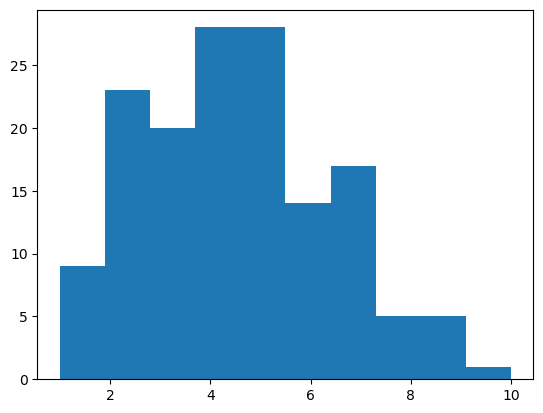

In [9]:
bins = np.linspace(sepal_length.min(), sepal_length.max(), 10)

sepal_length = np.digitize(sepal_length, bins)

print(sepal_length)

plt.hist(sepal_length)
plt.show()

Redefinimos los datos de $X$ divididos por clase con los nuevos datos discretizados, y obtenemos la frecuencia para los bins de cada clase

In [10]:
setosa_sepal_length = sepal_length[y == 0]
versicolor_sepal_length = sepal_length[y == 1]
virginica_sepal_length = sepal_length[y == 2]

In [11]:
setosa_bin_frequencies, _ = np.histogram(setosa_sepal_length, bins=10, range=(1,10))
print("Setosa bins frequencies: ", setosa_bin_frequencies.tolist())

versicolor_bin_frequencies, _ = np.histogram(versicolor_sepal_length, bins=10, range=(1,10))
print("Versicolor bins frequencies: ", versicolor_bin_frequencies.tolist())

virginica_bin_frequencies, _ = np.histogram(virginica_sepal_length, bins=10, range=(1,10))
print("Virginica bins frequencies: ", virginica_bin_frequencies.tolist())

Setosa bins frequencies:  [9, 19, 17, 5, 0, 0, 0, 0, 0, 0]
Versicolor bins frequencies:  [0, 3, 3, 18, 15, 5, 6, 0, 0, 0]
Virginica bins frequencies:  [0, 1, 0, 5, 13, 9, 11, 5, 5, 1]


In [12]:
xvalues = np.unique(sepal_length).tolist()
yvalues = np.unique(y).tolist()

print(xvalues, yvalues)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0, 1, 2]


In [13]:
categories = list(map(lambda x: iris.target_names[x], yvalues))
categories

['setosa', 'versicolor', 'virginica']

Vamos a calcular $p(y|x)$ dividiendo la frecuencia de la clase en un bin entre la frecuencia total de ese bin

In [14]:
bin_frequencies, _ = np.histogram(sepal_length, bins=10, range=(1,10))
bin_frequencies

array([ 9, 23, 20, 28, 28, 14, 17,  5,  5,  1])

In [15]:
p_y_x = pd.DataFrame(0, columns=categories, index=[])
p_y_x["setosa"] = setosa_bin_frequencies / bin_frequencies
p_y_x["versicolor"] = versicolor_bin_frequencies / bin_frequencies
p_y_x["virginica"] = virginica_bin_frequencies / bin_frequencies
p_y_x

,setosa,versicolor,virginica
0,1.000000,0.000000,0.000000
1,0.826087,0.130435,0.043478
2,0.850000,0.150000,0.000000
3,0.178571,0.642857,0.178571
4,0.000000,0.535714,0.464286
5,0.000000,0.357143,0.642857
6,0.000000,0.352941,0.647059
7,0.000000,0.000000,1.000000
8,0.000000,0.000000,1.000000
9,0.000000,0.000000,1.000000


In [16]:
pred_bin = np.digitize(4.75, bins)
pred_bin

2

In [17]:
predictions = np.random.choice(categories, size=10, p=p_y_x.loc[pred_bin - 1]).tolist()
predictions

['setosa',
 'setosa',
 'setosa',
 'versicolor',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa']

## Otra forma utilizando un modelo de tipo mezcla de gaussianas
$p(x) = ∑_y p(y) * N(μ_y,σ_y)$ manteniendo $X =$ sepal length

Obtenemos la media y la desviación estándar del sepal length de cada clase utilizando numpy

In [18]:
setosa_mean = np.mean(setosa_sepal_length)
versicolor_mean = np.mean(versicolor_sepal_length)
virginica_mean = np.mean(virginica_sepal_length)

setosa_std_dev = np.std(setosa_sepal_length)
versicolor_std_dev = np.std(versicolor_sepal_length)
virginica_std_dev = np.std(virginica_sepal_length)

means = np.array([setosa_mean, versicolor_mean, virginica_mean])
stds = np.array([setosa_std_dev, versicolor_std_dev, virginica_std_dev])
p_y = np.ones(3) / 3
classes = np.unique(y)

Sampleo una clase $y$ y, a partir de la media y la desviación estándar, genero una muestra con distribución normal para la $X$ de esa clase 

In [19]:
c = np.random.choice(classes, p=p_y)
c

2

In [20]:
sampled_x = np.random.normal(means[c], stds[c], 100)
sampled_x

array([ 9.28427687,  6.00246066,  5.91207805,  6.56695063,  6.13145481,
        5.84466895,  7.05438528,  7.18363021,  7.23072419,  8.18308981,
        5.31591734,  7.50938243,  5.10907694,  4.49917009,  6.79209826,
        8.75147979,  5.86069952,  4.24526458,  4.60551081,  6.47127655,
        8.07636271,  3.78472911,  6.15702482,  7.86138973,  6.16264282,
        8.91053354,  7.5532644 ,  7.63533504,  6.85552712,  6.94242937,
        3.75786819,  6.57289348,  5.99731271,  6.89330105,  4.64901721,
        4.50185419,  4.78786543,  5.34740449,  4.17628272,  6.44545818,
        4.32150986,  6.97408621,  3.91439998,  9.36774979,  7.17283558,
        5.15935805, 10.33833137,  3.71559386,  5.94199453,  4.6483777 ,
        6.49021925,  8.37839883,  8.07524446,  5.33116432,  6.91848104,
        7.26545994,  6.12079522,  7.54785927,  6.00307969,  5.13426426,
        5.74953305,  3.38122862,  5.39195206,  7.8674465 ,  3.68008751,
        4.83773298,  6.92227123,  3.26558817,  6.41990082,  8.92

(array([12., 10., 15., 14., 12., 16., 12.,  5.,  3.,  1.]),
 array([ 3.20917727,  3.92209268,  4.63500809,  5.3479235 ,  6.06083891,
         6.77375432,  7.48666973,  8.19958514,  8.91250055,  9.62541596,
        10.33833137]),
 <BarContainer object of 10 artists>)

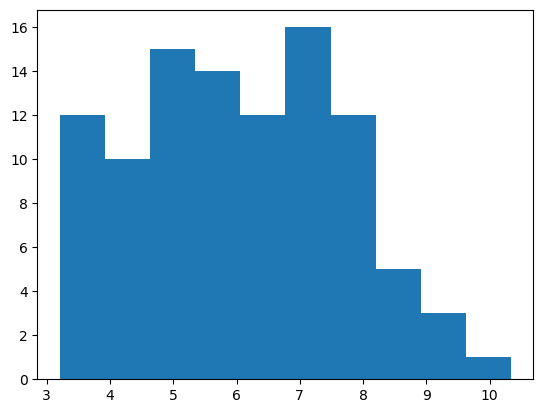

In [21]:
plt.hist(sampled_x)

In [22]:
print("Media de los datos sampleados: ", np.mean(sampled_x))
print("Media original: ", means[c])

print("Desviación estándar de los datos sampleados: ", np.std(sampled_x))
print("Desviación estándar original: ", stds[c])

Media de los datos sampleados:  6.067037242883775
Media original:  6.26
Desviación estándar de los datos sampleados:  1.5983825283838917
Desviación estándar original:  1.659035864591239


Se puede observar que los datos sampleados tienen distribución normal y la misma es similar a la original.

## Approximate $p(x|y)$
Take $y$ to be setosa and estimate the probability of sepal length given setosa (or, equivalently, the *likelihood* of setosa given sepal length). Then, generate 10 samples of sepal length and label them appropriately.

### Histogramas
Realizamos histogramas separando por $y$ para observar la distribución de cada clase.

#### Setosa

(array([ 9.,  0.,  0., 19.,  0.,  0., 17.,  0.,  0.,  5.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

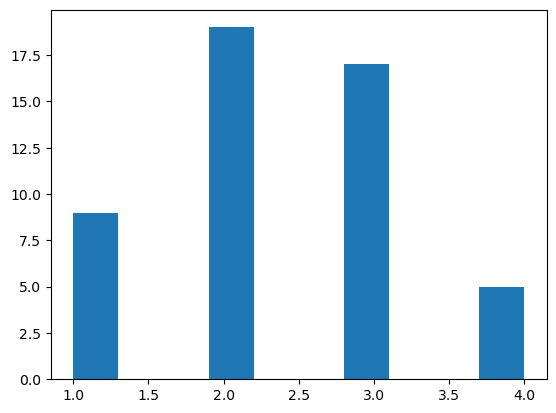

In [23]:
plt.hist(setosa_sepal_length, bins=10)

In [24]:
setosa_sepal_length

array([3, 2, 2, 1, 2, 3, 1, 2, 1, 2, 3, 2, 2, 1, 4, 4, 3, 3, 4, 3, 3, 3,
       1, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 4, 2, 2, 4, 2, 1, 3, 2, 1, 1, 2,
       3, 2, 3, 1, 3, 2])

In [25]:
print("Bins frequencies: ", setosa_bin_frequencies.tolist())

print("Mean: ", setosa_mean)

print("Standard deviation: ", setosa_std_dev)

setosa_sample = np.random.normal(setosa_mean, setosa_std_dev, 1000)

Bins frequencies:  [9, 19, 17, 5, 0, 0, 0, 0, 0, 0]
Mean:  2.36
Standard deviation:  0.8890444308357147


(array([ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  5.,  0.,  5.,  8.,  4., 14.,
        16., 15., 22., 24., 28., 30., 33., 47., 34., 44., 46., 50., 45.,
        45., 55., 48., 41., 58., 39., 40., 30., 32., 31., 28., 21., 16.,
        10.,  8.,  6.,  5.,  2.,  2.,  3.,  2.,  3.,  0.,  2.]),
 array([-0.63985283, -0.52652807, -0.41320332, -0.29987856, -0.18655381,
        -0.07322905,  0.04009571,  0.15342046,  0.26674522,  0.38006997,
         0.49339473,  0.60671949,  0.72004424,  0.833369  ,  0.94669375,
         1.06001851,  1.17334327,  1.28666802,  1.39999278,  1.51331753,
         1.62664229,  1.73996705,  1.8532918 ,  1.96661656,  2.07994131,
         2.19326607,  2.30659083,  2.41991558,  2.53324034,  2.64656509,
         2.75988985,  2.87321461,  2.98653936,  3.09986412,  3.21318887,
         3.32651363,  3.43983839,  3.55316314,  3.6664879 ,  3.77981265,
         3.89313741,  4.00646217,  4.11978692,  4.23311168,  4.34643643,
         4.45976119,  4.57308595,  4.6864107 ,  4.79973546,

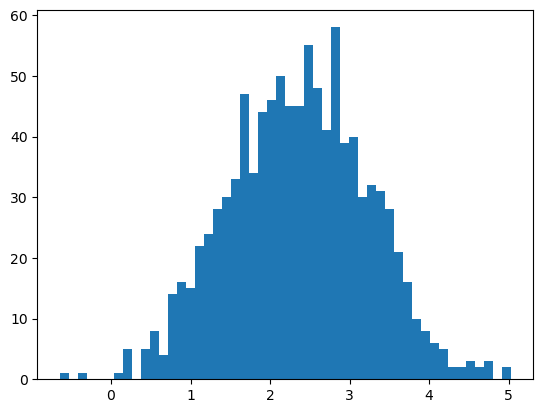

In [26]:
plt.hist(setosa_sample, bins=50)

#### Versicolor

(array([ 3.,  0.,  3.,  0., 18.,  0., 15.,  0.,  5.,  6.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <BarContainer object of 10 artists>)

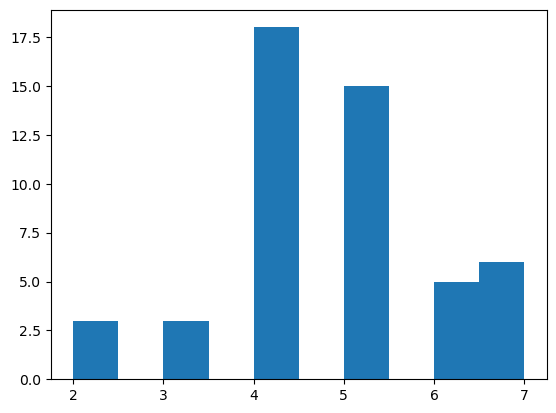

In [27]:
plt.hist(versicolor_sepal_length)

In [28]:
print("Bins frequencies: ", versicolor_bin_frequencies.tolist())

print("Mean: ", versicolor_mean)

print("Standard deviation: ", versicolor_std_dev)

versicolor_sample = np.random.normal(versicolor_mean, versicolor_std_dev, 1000)

Bins frequencies:  [0, 3, 3, 18, 15, 5, 6, 0, 0, 0]
Mean:  4.68
Standard deviation:  1.2718490476467716


(array([ 1.,  0.,  0.,  0.,  2.,  3.,  4.,  3.,  0.,  5.,  4.,  7.,  9.,
         6., 11., 24., 26., 26., 24., 29., 37., 34., 42., 48., 47., 45.,
        56., 55., 56., 55., 47., 35., 48., 36., 38., 22., 25., 25., 18.,
        12., 14.,  4.,  3.,  3.,  2.,  4.,  2.,  1.,  0.,  2.]),
 array([0.21305311, 0.37913109, 0.54520908, 0.71128707, 0.87736505,
        1.04344304, 1.20952102, 1.37559901, 1.54167699, 1.70775498,
        1.87383297, 2.03991095, 2.20598894, 2.37206692, 2.53814491,
        2.70422289, 2.87030088, 3.03637887, 3.20245685, 3.36853484,
        3.53461282, 3.70069081, 3.86676879, 4.03284678, 4.19892477,
        4.36500275, 4.53108074, 4.69715872, 4.86323671, 5.02931469,
        5.19539268, 5.36147067, 5.52754865, 5.69362664, 5.85970462,
        6.02578261, 6.19186059, 6.35793858, 6.52401656, 6.69009455,
        6.85617254, 7.02225052, 7.18832851, 7.35440649, 7.52048448,
        7.68656246, 7.85264045, 8.01871844, 8.18479642, 8.35087441,
        8.51695239]),
 <BarContainer

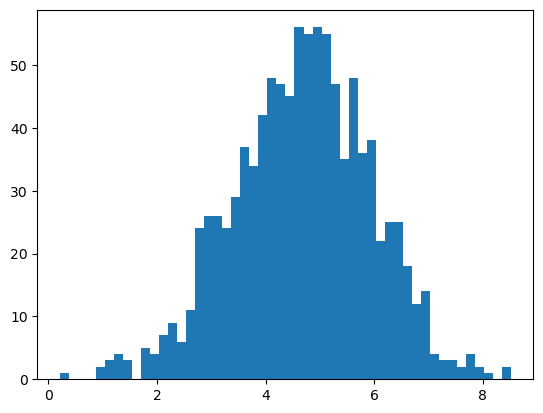

In [29]:
plt.hist(versicolor_sample, bins=50)

#### Virginica

(array([ 1.,  0.,  5., 13.,  0.,  9., 11.,  5.,  5.,  1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

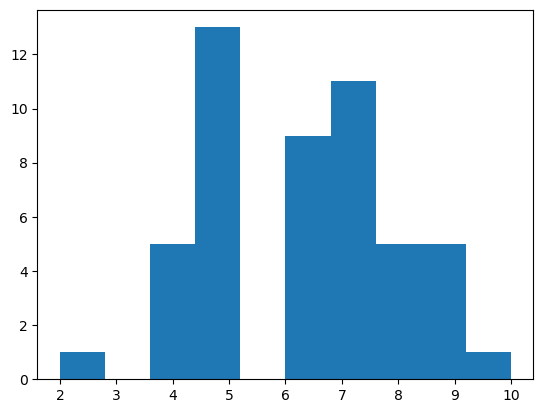

In [30]:
plt.hist(virginica_sepal_length)

In [31]:
print("Bins frequencies: ", virginica_bin_frequencies.tolist())

print("Mean: ", virginica_mean)

print("Standard deviation: ", virginica_std_dev)

virginica_sample = np.random.normal(virginica_mean, virginica_std_dev, 1000)

Bins frequencies:  [0, 1, 0, 5, 13, 9, 11, 5, 5, 1]
Mean:  6.26
Standard deviation:  1.659035864591239


(array([ 1.,  2.,  0.,  1.,  1.,  2.,  4.,  3.,  9.,  7.,  6., 10., 15.,
        13., 25., 17., 25., 30., 39., 29., 41., 37., 43., 53., 66., 68.,
        58., 60., 53., 49., 35., 37., 27., 27., 19., 15., 18., 16.,  7.,
         7., 10.,  3.,  5.,  2.,  1.,  2.,  0.,  0.,  1.,  1.]),
 array([ 0.88814086,  1.10054529,  1.31294973,  1.52535416,  1.73775859,
         1.95016302,  2.16256745,  2.37497189,  2.58737632,  2.79978075,
         3.01218518,  3.22458961,  3.43699405,  3.64939848,  3.86180291,
         4.07420734,  4.28661177,  4.49901621,  4.71142064,  4.92382507,
         5.1362295 ,  5.34863393,  5.56103837,  5.7734428 ,  5.98584723,
         6.19825166,  6.4106561 ,  6.62306053,  6.83546496,  7.04786939,
         7.26027382,  7.47267826,  7.68508269,  7.89748712,  8.10989155,
         8.32229598,  8.53470042,  8.74710485,  8.95950928,  9.17191371,
         9.38431814,  9.59672258,  9.80912701, 10.02153144, 10.23393587,
        10.44634031, 10.65874474, 10.87114917, 11.0835536 ,

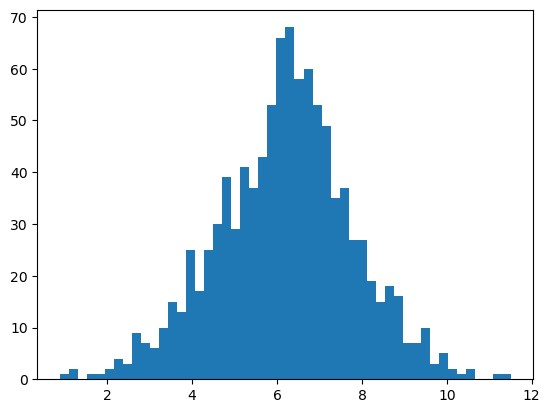

In [32]:
plt.hist(virginica_sample, bins=50)

Comprobamos que en los datos originales hay 3 distribuciones normales pero distintas, ya que cada una tiene una media y desviación estándar distinta: 

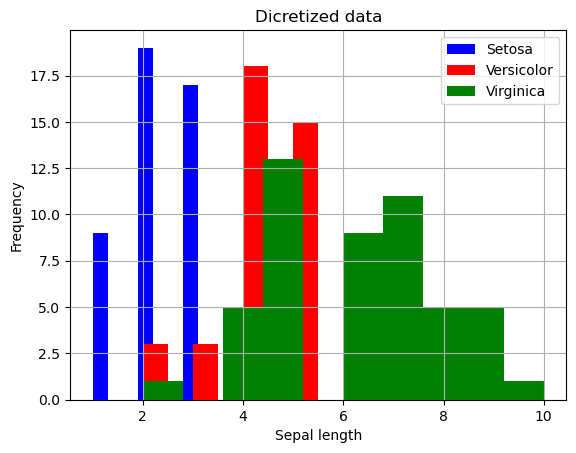

In [33]:
plt.hist(setosa_sepal_length, bins=10, color="blue", label="Setosa")
plt.hist(versicolor_sepal_length, bins=10, color="red", label="Versicolor")
plt.hist(virginica_sepal_length, bins=10, color="green", label="Virginica")
plt.xlabel("Sepal length")
plt.ylabel("Frequency")
plt.title("Dicretized data")
plt.legend()
plt.grid(True)
plt.show()

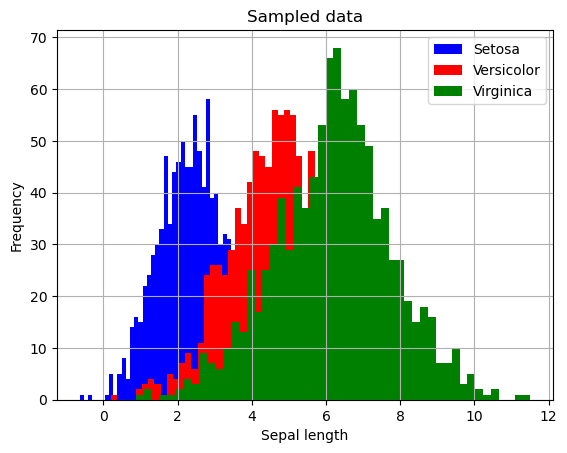

In [34]:
plt.hist(setosa_sample, bins=50, color="blue", label="Setosa")
plt.hist(versicolor_sample, bins=50, color="red", label="Versicolor")
plt.hist(virginica_sample, bins=50, color="green", label="Virginica")
plt.xlabel("Sepal length")
plt.ylabel("Frequency")
plt.title("Sampled data")
plt.legend()
plt.grid(True)
plt.show()

Definimos p(x|y) a partir de los histogramas

In [35]:
p_x_y = pd.DataFrame(0, columns=categories, index=[])
p_x_y["setosa"] = setosa_bin_frequencies / np.sum(setosa_bin_frequencies)
p_x_y["versicolor"] = versicolor_bin_frequencies / np.sum(versicolor_bin_frequencies)
p_x_y["virginica"] = virginica_bin_frequencies / np.sum(virginica_bin_frequencies)
p_x_y

,setosa,versicolor,virginica
0,0.18,0.00,0.00
1,0.38,0.06,0.02
2,0.34,0.06,0.00
3,0.10,0.36,0.10
4,0.00,0.30,0.26
5,0.00,0.10,0.18
6,0.00,0.12,0.22
7,0.00,0.00,0.10
8,0.00,0.00,0.10
9,0.00,0.00,0.02


Se samplea un bin de acuerdo a p(x|y) y dentro del bin obtenido se samplea un x con distribución uniforme

In [36]:
sampled_bins = np.random.choice(xvalues, size=10, p=p_x_y["setosa"])
sampled_values = np.random.uniform(low=np.where(sampled_bins - 2 == -1, bins[0], bins[sampled_bins - 2]), high=np.where(sampled_bins - 2 == -1, bins[1], bins[sampled_bins - 1]))
sampled_values

array([4.97116739, 4.8275199 , 4.47870553, 4.39875138, 5.1824355 ,
       5.02818294, 4.70244491, 5.05239826, 5.33856329, 4.98135141])